<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/WineQuality(NewHorizon_Keras_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

<ipython-input-8-d57511d72f78>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('/content/sample_data/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [13]:
# Code above was prepared by kaggle

In [14]:
# Now my code kicks in

In [15]:
# Here we set optimizer to adam and loss to mae (mean absolute error)
model.compile(
    optimizer='adam',
    loss='mae'
)

In [16]:
# Now we feet the model
# We have 200 epochs of learning(meaning that model'll see each sample 200 times)
history = model.fit(X, y, batch_size=128, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 5ms/step - loss: 2.3658
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 0.8573
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.4482
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3282
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2394
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1801
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1360
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1130
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0964
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0839
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 12/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0694
Epoch 13/200
9/9 [==============================] - 0s 3ms/st

In [21]:
# Yeah... We have history attr with loss history
history_df = pd.DataFrame(history.history)
history_df.head()

,loss
0,2.365785
1,0.857315
2,0.448173
3,0.328222
4,0.239440


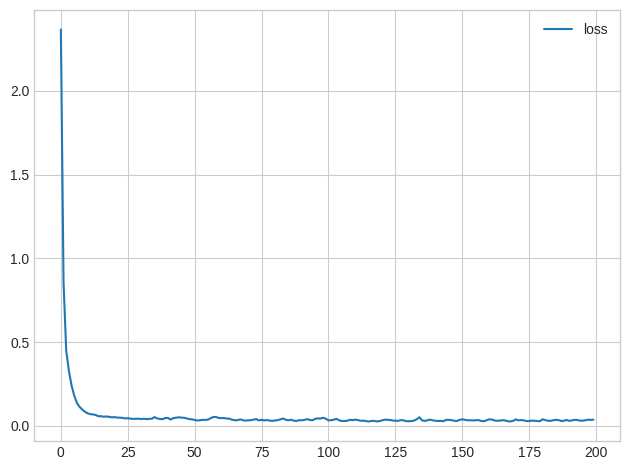

In [22]:
history_df['loss'].plot();
plt.legend()
plt.show();

<img src='https://u.kanobu.ru/editor/images/45/2fa2dfe3-f5cf-4187-bccb-25af867b4bce.jpg'>
